In [3]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import time
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
import pickle
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import shap

In [6]:
os.getcwd()

'/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks'

In [2]:
shap.initjs()

In [37]:
random_seed = 123

print("start")

df_eco = pd.read_csv('../../tables/kgmicrobe_table.tsv', sep='\t',  encoding='utf-8')#index_col=1,
print(df_eco.head())

start
            subject  value.ECOCORE:00000172  value.ENVO:00000215  \
1   NCBITaxon:54261                     1.0                  NaN   
3    NCBITaxon:2714                     NaN                  1.0   
6     NCBITaxon:266                     NaN                  NaN   
8   NCBITaxon:36861                     1.0                  NaN   
10   NCBITaxon:1484                     NaN                  NaN   

    value.ECOCORE:00000173  value.Shape:bacillus  value.ENVO:01000306  \
1                      NaN                   NaN                  NaN   
3                      NaN                   NaN                  NaN   
6                      1.0                   NaN                  NaN   
8                      NaN                   NaN                  NaN   
10                     1.0                   1.0                  1.0   

    value.ECOCORE:00000177  value.ECOCORE:00000179  value.ENVO:00002007  \
1                      NaN                     NaN                  NaN

In [38]:
df_eco.shape

(31385, 186)

In [45]:
subjects = df_eco.loc[:,"subject"]
df_eco_small = df_eco
df_eco_small.drop('subject', axis=1, inplace=True)

In [46]:
df_eco_small = df_eco.fillna(0)

In [47]:
print(df_eco_small.describe())

       value.ECOCORE:00000172  value.ENVO:00000215  value.ECOCORE:00000173  \
count            31385.000000         31385.000000            31385.000000   
mean                 0.179417             0.007296                0.249610   
std                  0.383707             0.085109                0.432794   
min                  0.000000             0.000000                0.000000   
25%                  0.000000             0.000000                0.000000   
50%                  0.000000             0.000000                0.000000   
75%                  0.000000             0.000000                0.000000   
max                  1.000000             1.000000                1.000000   

       value.Shape:bacillus  value.ENVO:01000306  value.ECOCORE:00000177  \
count          31385.000000         31385.000000            31385.000000   
mean               0.373140             0.007296                0.175116   
std                0.483647             0.085109                0.380

In [43]:
df_eco_small = df_eco_small.loc[~(df_eco_small==0).all(axis=1)]

In [49]:
df_eco_small.shape

(31385, 185)

In [50]:
#value.Shape:bacillus
y = df_eco_small['value.Shape:bacillus']
print(y)

print("df_eco "+str(df_eco_small.shape))

X = df_eco_small.drop('value.Shape:bacillus', 1)#df_eco.iloc[:,:-1]

1         0.0
3         0.0
6         0.0
8         0.0
10        1.0
         ... 
122513    1.0
122533    0.0
122619    0.0
122621    0.0
122707    0.0
Name: value.Shape:bacillus, Length: 31385, dtype: float64
df_eco (31385, 185)


In [51]:
df_eco_small[df_eco_small.isin(['NCBITaxon:1095661']).any(1)]

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,value.ECOCORE:00000172,value.ENVO:00000215,value.ECOCORE:00000173,value.Shape:bacillus,value.ENVO:01000306,value.ECOCORE:00000177,value.ECOCORE:00000179,value.ENVO:00002007,value.ECOCORE:00000180,value.ENVO:00000051,...,value.CHEBI:18401,value.Carbon:methyl_beta-d-glucoside,value.Shape:branced,value.Shape:flask,value.Shape:tailed,value.Shape:triangular,value.Shape:ring,value.Shape:spindle,value.Shape:spirochete,value.OBI:0100026


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed) #, random_state=9# The seed was 'chosen' so test and training contain all labels: rn=3,4,8,9
print("train label deficit:",len(set(y)-set(y_train)),"test label deficit:",len(set(y)-set(y_test)))

print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

input_data_dump = [X, y, X_train, X_test, y_train, y_test]
pickle.dump(input_data_dump,open("input_data_dump", "wb" ) )

train label deficit: 0 test label deficit: 0
shapes (23538, 184)	(7847, 184)	(23538,)	(7847,)


In [53]:
modelstart = time.time()

print(f"Starting search at {modelstart}")
cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 200,
                             verbose = 5,
                             learning_rate = 0.1,
                             depth = 3,
                             l2_leaf_reg = 0.5,
                             #eval_metric = 'MCC',
                             random_seed = random_seed,
                             #bagging_temperature = 0.2,
                             #od_type = 'Iter',
                             #od_wait = 100
)

grid = {#'iterations': [100, 150, 200],
       'learning_rate': [0.6, 0.8, 1],
        'depth': [3,4,5],
        'l2_leaf_reg': [2,3,4]}
grid_search_result = cb_model.grid_search(grid, train_dataset)

lr = grid_search_result['params']['learning_rate']
de = grid_search_result['params']['depth']
l2 = grid_search_result['params']['l2_leaf_reg']

print(f"Trained grid search in {time.time() - modelstart}s")

print("lr, de, l2 "+str(lr)+", "+str(de)+", "+str(l2))

Starting search at 1615538103.311313

bestTest = 0.2151100552
bestIteration = 171

0:	loss: 0.2151101	best: 0.2151101 (0)	total: 1.25s	remaining: 32.6s

bestTest = 0.2166775417
bestIteration = 193

1:	loss: 0.2166775	best: 0.2151101 (0)	total: 2.42s	remaining: 30.3s

bestTest = 0.2189885106
bestIteration = 93

2:	loss: 0.2189885	best: 0.2151101 (0)	total: 3.63s	remaining: 29s

bestTest = 0.2131915303
bestIteration = 143

3:	loss: 0.2131915	best: 0.2131915 (3)	total: 4.74s	remaining: 27.3s

bestTest = 0.2166775417
bestIteration = 193

4:	loss: 0.2166775	best: 0.2131915 (3)	total: 5.91s	remaining: 26s

bestTest = 0.2189885106
bestIteration = 93

5:	loss: 0.2189885	best: 0.2131915 (3)	total: 7.14s	remaining: 25s

bestTest = 0.2131915303
bestIteration = 143

6:	loss: 0.2131915	best: 0.2131915 (3)	total: 8.26s	remaining: 23.6s

bestTest = 0.2166775417
bestIteration = 193

7:	loss: 0.2166775	best: 0.2131915 (3)	total: 9.4s	remaining: 22.3s

bestTest = 0.2189885106
bestIteration = 93

8:	loss

In [54]:
modelstart = time.time()

print(f"Starting at {modelstart}")
cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 200,
                             verbose = 5,
                             learning_rate = lr,
                             depth = de,
                             l2_leaf_reg = l2,
                             #eval_metric = 'MCC',
                             random_seed = random_seed,
                             #bagging_temperature = 0.2,
                             #od_type = 'Iter',
                             #od_wait = 100
)

cbmf = cb_model.fit(X_train, y_train)
print(f"Trained in {time.time() - modelstart}s")

Starting at 1615538217.8898911
0:	learn: 0.2344715	total: 9.92ms	remaining: 1.97s
5:	learn: 0.1984447	total: 50.3ms	remaining: 1.63s
10:	learn: 0.1970852	total: 88.6ms	remaining: 1.52s
15:	learn: 0.1938988	total: 128ms	remaining: 1.47s
20:	learn: 0.1916471	total: 170ms	remaining: 1.45s
25:	learn: 0.1901602	total: 214ms	remaining: 1.44s
30:	learn: 0.1888432	total: 255ms	remaining: 1.39s
35:	learn: 0.1888432	total: 297ms	remaining: 1.35s
40:	learn: 0.1887582	total: 337ms	remaining: 1.31s
45:	learn: 0.1863791	total: 378ms	remaining: 1.27s
50:	learn: 0.1863791	total: 421ms	remaining: 1.23s
55:	learn: 0.1863791	total: 465ms	remaining: 1.2s
60:	learn: 0.1863791	total: 514ms	remaining: 1.17s
65:	learn: 0.1863791	total: 562ms	remaining: 1.14s
70:	learn: 0.1863791	total: 605ms	remaining: 1.1s
75:	learn: 0.1863791	total: 648ms	remaining: 1.06s
80:	learn: 0.1863791	total: 690ms	remaining: 1.01s
85:	learn: 0.1863367	total: 732ms	remaining: 970ms
90:	learn: 0.1863366	total: 774ms	remaining: 927ms
9

In [55]:
pred_train = cb_model.predict(X_train)
rmseT = (np.sqrt(mean_squared_error(y_train, pred_train)))
r2T = r2_score(y_train, pred_train)
print("Testing performance:")
print('RMSE training: {:.2f}'.format(rmseT))
print('R2 training: {:.2f}'.format(r2T))


Testing performance:
RMSE training: 0.43
R2 training: 0.21


In [56]:
cbmf.feature_names = X.columns

In [57]:
pred_test = cb_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_test)))
r2 = r2_score(y_test, pred_test)
print("Testing performance:")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance:
RMSE: 0.43
R2: 0.21


In [58]:
explainer_model = shap.TreeExplainer(cb_model)
explainer_fit = shap.TreeExplainer(cbmf)

In [59]:
data_output = [random_seed, cb_model, cbmf, pred_train, explainer_model, pred_test, explainer_fit]
pickle.dump(data_output,open("data_output", "wb" ) )

Text(0.5, 0, 'CatBoost Feature Importance')

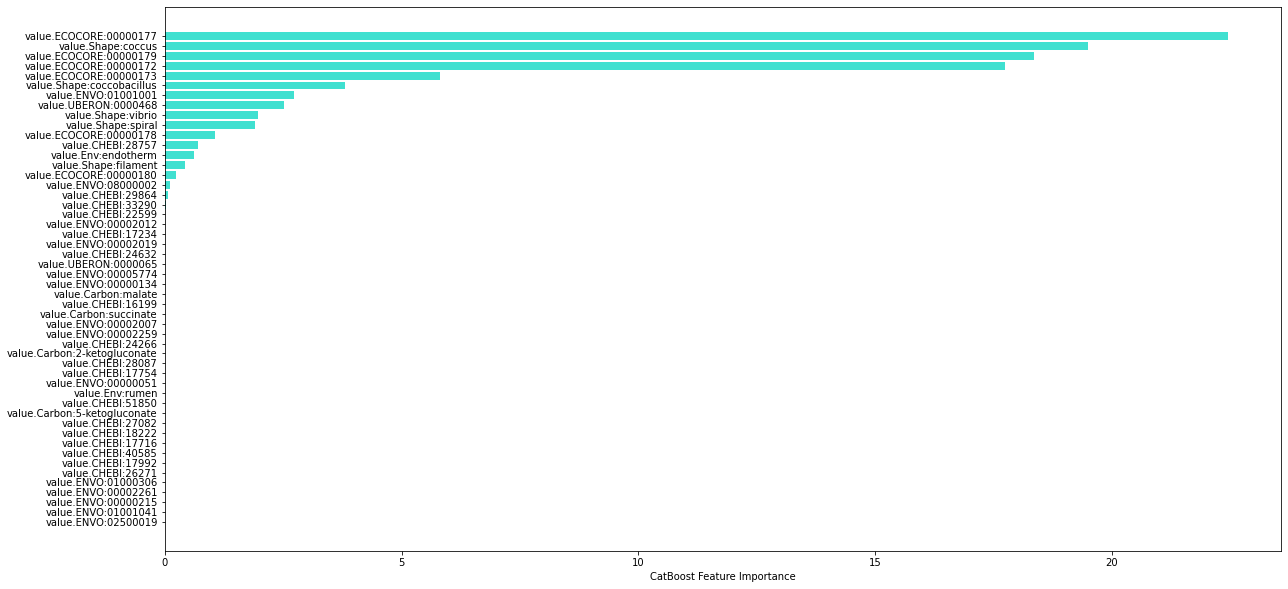

In [60]:
sorted_feature_importance = cb_model.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(cb_model.feature_names[sorted_feature_importance][-50:],
        cb_model.feature_importances_[sorted_feature_importance][-50:],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [61]:
shap_values = explainer_model.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names = cb_model.feature_names[sorted_feature_importance],max_display=X.shape[1])#,matplotlib=True).savefig('SHAP.pdf',bbox_inches = 'tight')

KeyboardInterrupt: 

In [65]:
shap_values = explainer_fit.shap_values(X_train)
shap.force_plot(explainer_fit.expected_value, shap_values[0:20,:], X_train.iloc[0:20,:])

In [64]:
cbmf_all = cb_model.fit(X,y)

0:	learn: 0.2065951	total: 10.6ms	remaining: 2.12s
5:	learn: 0.2009873	total: 61.4ms	remaining: 1.98s
10:	learn: 0.1949972	total: 108ms	remaining: 1.85s
15:	learn: 0.1926713	total: 155ms	remaining: 1.78s
20:	learn: 0.1902179	total: 204ms	remaining: 1.74s
25:	learn: 0.1899630	total: 261ms	remaining: 1.75s
30:	learn: 0.1884336	total: 313ms	remaining: 1.71s
35:	learn: 0.1884336	total: 364ms	remaining: 1.66s
40:	learn: 0.1884336	total: 414ms	remaining: 1.61s
45:	learn: 0.1880194	total: 465ms	remaining: 1.56s
50:	learn: 0.1879556	total: 518ms	remaining: 1.51s
55:	learn: 0.1879557	total: 569ms	remaining: 1.46s
60:	learn: 0.1879557	total: 619ms	remaining: 1.41s
65:	learn: 0.1879557	total: 672ms	remaining: 1.36s
70:	learn: 0.1879557	total: 729ms	remaining: 1.32s
75:	learn: 0.1879556	total: 791ms	remaining: 1.29s
80:	learn: 0.1858846	total: 850ms	remaining: 1.25s
85:	learn: 0.1858846	total: 910ms	remaining: 1.21s
90:	learn: 0.1858846	total: 969ms	remaining: 1.16s
95:	learn: 0.1858846	total: 1.0

In [66]:
pred_all = cbmf_all.predict(X)
rmseA = (np.sqrt(mean_squared_error(y, pred_all)))
r2A = r2_score(y, pred_all)
print("All performance:")
print('RMSE training: {:.2f}'.format(rmseA))
print('R2 training: {:.2f}'.format(r2A))

All performance:
RMSE training: 0.43
R2 training: 0.22


In [67]:

explainer_all = shap.TreeExplainer(cbmf_all)

In [ ]:
shap_values_all = explainer_all.shap_values(X)
shap.summary_plot(shap_values_all, X, feature_names = cb_model.feature_names[sorted_feature_importance],max_display=X.shape[1])#,matplotlib=True).savefig('SHAP.pdf',bbox_inches = 'tight')

Text(0.5, 0, 'CatBoost Feature Importance')

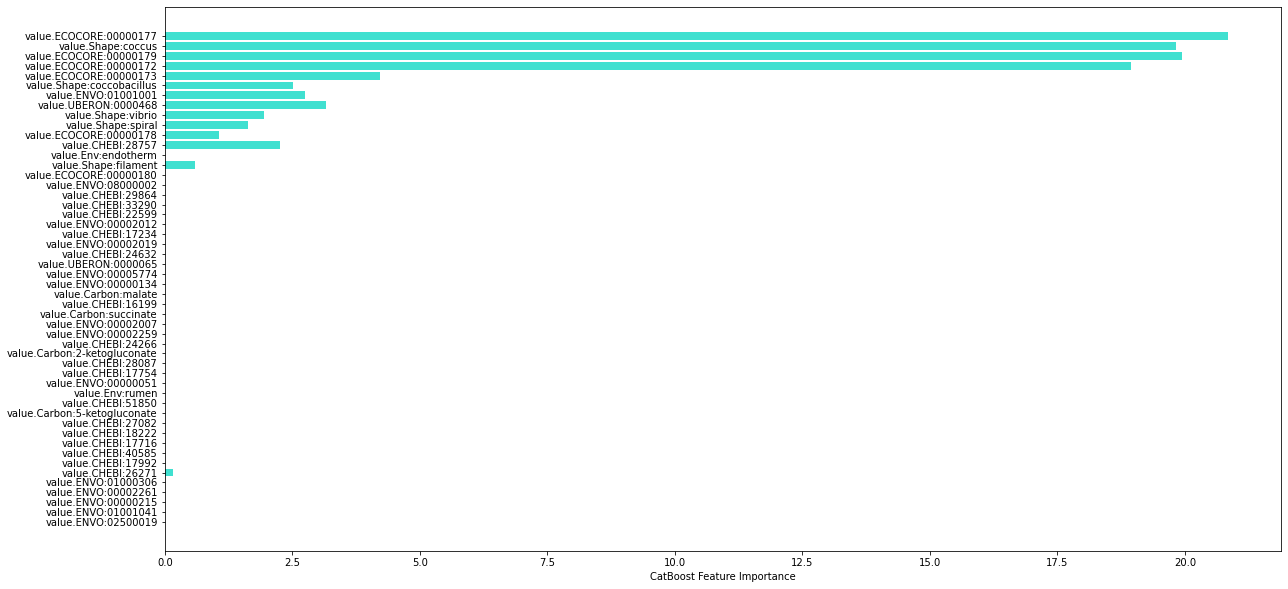

In [68]:
_feature_importance = cbmf_all.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(cb_model.feature_names[sorted_feature_importance][-50:],
        cb_model.feature_importances_[sorted_feature_importance][-50:],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")
